In [208]:
# import all relevant libraries for preprocessing and gensim 
import os 
import re
import random
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [209]:
# read in the data
um = pd.read_csv(r"C:\Users\Home\Desktop\Python Scripts\kat-master\um_features.csv")
um.head()

,lemma,tag
0,შეუძლია,V;ARGNO1S;IND;PRS
1,შეუძლია,V;ARGNO2S;IND;PRS
2,შეუძლია,V;ARGNO3S;IND;PRS
3,შეუძლია,V;ARGNO1P;IND;PRS
4,შეუძლია,V;ARGNO2P;IND;PRS


In [210]:
# Check for Latin characters in the lemma column
latin_pattern = re.compile(r'[a-zA-Z]')
um['contains_latin'] = um['lemma'].apply(lambda lemmas: any(latin_pattern.search(lemma) for lemma in lemmas))

# Display rows with Latin characters in the lemma column
latin_rows = um[um['contains_latin']]
print(latin_rows)

Empty DataFrame
Columns: [lemma, tag, contains_latin]
Index: []


In [211]:
# make a list of Georgian chars
georgian_chars = [
    'ა', 
    'ბ', 
    'გ', 
    'დ', 
    'ე', 
    'ვ', 
    'ზ', 
    'თ', 
    'ი', 
    'კ', 
    'ლ', 
    'მ', 
    'ნ', 
    'ო', 
    'პ', 
    'ჟ', 
    'რ', 
    'ს', 
    'ტ', 
    'უ', 
    'ფ', 
    'ქ', 
    'ღ', 
    'ყ', 
    'შ', 
    'ჩ', 
    'ც', 
    'ძ', 
    'წ', 
    'ჭ', 
    'ხ', 
    'ჯ', 
    'ჰ']

In [212]:
# vocab dict with chars as keys and indices as values
SPECIAL_TOKENS = ['<pad>', '<bos>', '<eos>']
# create a dictionary with special tokens and Georgian characters as keys and their respective indices as values
char2idx = {
    **{c: i for i, c in enumerate(SPECIAL_TOKENS)},
    **{c: i + len(SPECIAL_TOKENS) for i, c in enumerate(sorted(georgian_chars))}
}

print(char2idx)

{'<pad>': 0, '<bos>': 1, '<eos>': 2, 'ა': 3, 'ბ': 4, 'გ': 5, 'დ': 6, 'ე': 7, 'ვ': 8, 'ზ': 9, 'თ': 10, 'ი': 11, 'კ': 12, 'ლ': 13, 'მ': 14, 'ნ': 15, 'ო': 16, 'პ': 17, 'ჟ': 18, 'რ': 19, 'ს': 20, 'ტ': 21, 'უ': 22, 'ფ': 23, 'ქ': 24, 'ღ': 25, 'ყ': 26, 'შ': 27, 'ჩ': 28, 'ც': 29, 'ძ': 30, 'წ': 31, 'ჭ': 32, 'ხ': 33, 'ჯ': 34, 'ჰ': 35}


In [213]:
# vocab dict with tags from the data as keys and indices as values
## first seperate the tag column by the delimiter and make a list of all tags
um['tag'] = um['tag'].str.split(';')
um["tag"]

0                  [V, ARGNO1S, IND, PRS]
1                  [V, ARGNO2S, IND, PRS]
2                  [V, ARGNO3S, IND, PRS]
3                  [V, ARGNO1P, IND, PRS]
4                  [V, ARGNO2P, IND, PRS]
                       ...               
21049    [V, ARGNO1P, ARGAC3P, SBJV, PRF]
21050    [V, ARGNO2P, ARGAC3P, SBJV, PRF]
21051    [V, ARGNO3P, ARGAC3P, SBJV, PRF]
21052                    [V, V.MSDR, PRF]
21053                   [V, V.MSDR, IPFV]
Name: tag, Length: 21054, dtype: object

In [214]:
um['tag'] = um['tag'].apply(lambda tags: [tag for tag in tags if tag != "V"])
um["tag"]

0                  [ARGNO1S, IND, PRS]
1                  [ARGNO2S, IND, PRS]
2                  [ARGNO3S, IND, PRS]
3                  [ARGNO1P, IND, PRS]
4                  [ARGNO2P, IND, PRS]
                     ...              
21049    [ARGNO1P, ARGAC3P, SBJV, PRF]
21050    [ARGNO2P, ARGAC3P, SBJV, PRF]
21051    [ARGNO3P, ARGAC3P, SBJV, PRF]
21052                    [V.MSDR, PRF]
21053                   [V.MSDR, IPFV]
Name: tag, Length: 21054, dtype: object

In [215]:
# make a list of all tags
all_tags = []
for tags in um['tag']:
    all_tags.extend(tags)
all_tags
# remove duplicates from the list of tags
all_tags = list(set(all_tags))
# make a dict with tags as keys and indices as values
tag2idx = {
    tag: i+0 for i, tag in enumerate(sorted(all_tags))
}

tag2idx

{'ARGAC1P': 0,
 'ARGAC1S': 1,
 'ARGAC2P': 2,
 'ARGAC2S': 3,
 'ARGAC3P': 4,
 'ARGAC3S': 5,
 'ARGNO1P': 6,
 'ARGNO1S': 7,
 'ARGNO2P': 8,
 'ARGNO2S': 9,
 'ARGNO3P': 10,
 'ARGNO3S': 11,
 'COND': 12,
 'FUT': 13,
 'IMP': 14,
 'IND': 15,
 'IPFV': 16,
 'OPT': 17,
 'PFV': 18,
 'PRF': 19,
 'PRS': 20,
 'PST': 21,
 'SBJV': 22,
 'V.MSDR': 23}

In [216]:
# split the lemma column by characters and make a list of all lemmas
um['lemma'] = um['lemma'].str.split('')
# strip empty strings from the list of lemmas
um['lemma'] = um['lemma'].apply(lambda lemmas: [lemma for lemma in lemmas if lemma != ""])
um['lemma']

0        [შ, ე, უ, ძ, ლ, ი, ა]
1        [შ, ე, უ, ძ, ლ, ი, ა]
2        [შ, ე, უ, ძ, ლ, ი, ა]
3        [შ, ე, უ, ძ, ლ, ი, ა]
4        [შ, ე, უ, ძ, ლ, ი, ა]
                 ...          
21049             [წ, ე, რ, ს]
21050             [წ, ე, რ, ს]
21051             [წ, ე, რ, ს]
21052             [წ, ე, რ, ს]
21053             [წ, ე, რ, ს]
Name: lemma, Length: 21054, dtype: object

In [217]:
def tokenize(row):
    tokens = ["<bos>"]
    tokens.extend(row['lemma']) 
    tokens.extend(row['tag'])
    tokens.append("<eos>")
    return tokens

um['tokens'] = um.apply(tokenize, axis=1)
um['tokens']

0        [<bos>, შ, ე, უ, ძ, ლ, ი, ა, ARGNO1S, IND, PRS...
1        [<bos>, შ, ე, უ, ძ, ლ, ი, ა, ARGNO2S, IND, PRS...
2        [<bos>, შ, ე, უ, ძ, ლ, ი, ა, ARGNO3S, IND, PRS...
3        [<bos>, შ, ე, უ, ძ, ლ, ი, ა, ARGNO1P, IND, PRS...
4        [<bos>, შ, ე, უ, ძ, ლ, ი, ა, ARGNO2P, IND, PRS...
                               ...                        
21049    [<bos>, წ, ე, რ, ს, ARGNO1P, ARGAC3P, SBJV, PR...
21050    [<bos>, წ, ე, რ, ს, ARGNO2P, ARGAC3P, SBJV, PR...
21051    [<bos>, წ, ე, რ, ს, ARGNO3P, ARGAC3P, SBJV, PR...
21052              [<bos>, წ, ე, რ, ს, V.MSDR, PRF, <eos>]
21053             [<bos>, წ, ე, რ, ს, V.MSDR, IPFV, <eos>]
Name: tokens, Length: 21054, dtype: object

In [218]:
# build one unified vocab for X
symbols = SPECIAL_TOKENS + sorted(georgian_chars) + sorted(all_tags)
feature_vocab_dict = {sym: i for i, sym in enumerate(symbols)}
feature_vocab_dict

{'<pad>': 0,
 '<bos>': 1,
 '<eos>': 2,
 'ა': 3,
 'ბ': 4,
 'გ': 5,
 'დ': 6,
 'ე': 7,
 'ვ': 8,
 'ზ': 9,
 'თ': 10,
 'ი': 11,
 'კ': 12,
 'ლ': 13,
 'მ': 14,
 'ნ': 15,
 'ო': 16,
 'პ': 17,
 'ჟ': 18,
 'რ': 19,
 'ს': 20,
 'ტ': 21,
 'უ': 22,
 'ფ': 23,
 'ქ': 24,
 'ღ': 25,
 'ყ': 26,
 'შ': 27,
 'ჩ': 28,
 'ც': 29,
 'ძ': 30,
 'წ': 31,
 'ჭ': 32,
 'ხ': 33,
 'ჯ': 34,
 'ჰ': 35,
 'ARGAC1P': 36,
 'ARGAC1S': 37,
 'ARGAC2P': 38,
 'ARGAC2S': 39,
 'ARGAC3P': 40,
 'ARGAC3S': 41,
 'ARGNO1P': 42,
 'ARGNO1S': 43,
 'ARGNO2P': 44,
 'ARGNO2S': 45,
 'ARGNO3P': 46,
 'ARGNO3S': 47,
 'COND': 48,
 'FUT': 49,
 'IMP': 50,
 'IND': 51,
 'IPFV': 52,
 'OPT': 53,
 'PFV': 54,
 'PRF': 55,
 'PRS': 56,
 'PST': 57,
 'SBJV': 58,
 'V.MSDR': 59}

In [219]:
# read in target data
target = pd.read_csv(r"C:\Users\Home\Desktop\Python Scripts\kat-master\um_target.csv")
target.head()

,form
0,შემიძლია
1,შეგიძლია
2,შეუძლია
3,შეგვიძლია
4,შეგიძლიათ


In [220]:
# Identify and correct rows where Latin 'a' appears in the 'form' column
target['form'] = target['form'].apply(
    lambda x: x.replace('a', 'ა') if re.search(r'[a-zA-Z]', x) else x
)

In [235]:
def tokenize_target(row):
    tokens_target = ["<bos>"]
    tokens_target.extend(row['form']) 
    tokens_target.append("<eos>")
    return tokens_target
# apply the function to the target data
target['tokens'] = target.apply(tokenize_target, axis=1)
target['tokens']
symbols = ['<bos>', '<eos>'] + sorted(georgian_chars)
target_vocab_dict = {sym: i for i, sym in enumerate(symbols)}

In [222]:
len(feature_vocab_dict)

60

In [223]:
# model variables 
X = um['tokens'].values
y = target['tokens'].values
# check the data
print(X[0])
print(y[0])

['<bos>', 'შ', 'ე', 'უ', 'ძ', 'ლ', 'ი', 'ა', 'ARGNO1S', 'IND', 'PRS', '<eos>']
['<bos>', 'შ', 'ე', 'მ', 'ი', 'ძ', 'ლ', 'ი', 'ა', '<eos>']


In [224]:
# train, val, test split
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
val_size = 0.15 / (1 - 0.15)  # Adjust the validation size to account for the test split
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=val_size, random_state=42)
# check the data
print("Train size X:", len(X_train), "Validation size:", len(X_val), "Test size:", len(X_test))
print("Train size y:", len(y_train), "Validation size:", len(y_val), "Test size:", len(y_test))


Train size X: 14737 Validation size: 3158 Test size: 3159
Train size y: 14737 Validation size: 3158 Test size: 3159


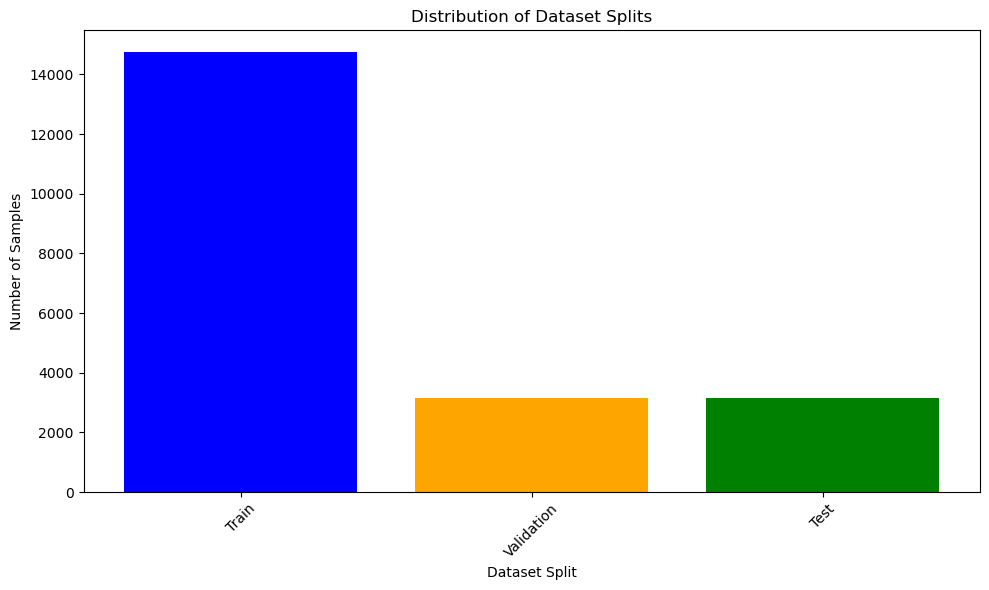

In [225]:
# visualize train, val, test split
import matplotlib.pyplot as plt

# Create a bar plot to visualize the distribution of the dataset
plt.figure(figsize=(10, 6))
plt.bar(['Train', 'Validation', 'Test'], [len(X_train), len(X_val), len(X_test)], color=['blue', 'orange', 'green'])
plt.xlabel('Dataset Split')
plt.ylabel('Number of Samples')
plt.title('Distribution of Dataset Splits')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [226]:
# Encode the datasets into their index representations
X_train_idx = [[feature_vocab_dict[token] for token in sequence] for sequence in X_train]
X_val_idx = [[feature_vocab_dict[token] for token in sequence] for sequence in X_val]
X_test_idx = [[feature_vocab_dict[token] for token in sequence] for sequence in X_test]

print("Encoded X_train_idx:", X_train_idx[:2])  # Print first two examples for verification
print("Encoded X_val_idx:", X_val_idx[:2])    # Print first two examples for verification
print("Encoded X_test_idx:", X_test_idx[:2])  # Print first two examples for verification

# Encode the target datasets into their index representations
y_train_idx = [[target_vocab_dict[token] for token in sequence] for sequence in y_train]
y_val_idx = [[target_vocab_dict[token] for token in sequence] for sequence in y_val]
y_test_idx = [[target_vocab_dict[token] for token in sequence] for sequence in y_test]

print("Encoded y_train_idx:", y_train_idx[:2])  # Print first two examples for verification
print("Encoded y_val_idx:", y_val_idx[:2])    # Print first two examples for verification
print("Encoded y_test_idx:", y_test_idx[:2])  # Print first two examples for verification

Encoded X_train_idx: [[1, 3, 27, 7, 15, 7, 4, 20, 45, 37, 51, 56, 2], [1, 31, 16, 15, 11, 20, 44, 40, 51, 57, 55, 2]]
Encoded X_val_idx: [[1, 7, 33, 14, 3, 19, 7, 4, 3, 43, 39, 51, 49, 2], [1, 3, 33, 19, 28, 16, 4, 20, 45, 41, 51, 55, 2]]
Encoded X_test_idx: [[1, 22, 20, 14, 7, 15, 20, 47, 37, 48, 2], [1, 3, 10, 7, 10, 19, 7, 4, 20, 47, 39, 51, 57, 55, 2]]
Encoded y_train_idx: [[0, 13, 2, 26, 6, 14, 6, 3, 1], [0, 2, 4, 6, 30, 15, 14, 2, 9, 1]]
Encoded y_val_idx: [[0, 5, 2, 4, 6, 32, 13, 2, 18, 6, 3, 10, 1], [0, 5, 2, 4, 10, 32, 18, 27, 7, 10, 2, 1]]
Encoded y_test_idx: [[0, 13, 15, 13, 10, 19, 13, 6, 14, 5, 2, 1], [0, 4, 2, 6, 9, 6, 9, 18, 6, 3, 10, 14, 6, 1]]


In [227]:
# Function to check if all elements in a dataset are integers
def check_for_strings(encoded_dataset):
    for sequence in encoded_dataset:
        if any(not isinstance(token, int) for token in sequence):
            return True
    return False

# Check for strings in the encoded datasets
has_strings_in_X_train = check_for_strings(X_train_idx)
has_strings_in_X_val = check_for_strings(X_val_idx)
has_strings_in_X_test = check_for_strings(X_test_idx)
has_strings_in_y_train = check_for_strings(y_train_idx)
has_strings_in_y_val = check_for_strings(y_val_idx)
has_strings_in_y_test = check_for_strings(y_test_idx)

print("Strings in X_train_idx:", has_strings_in_X_train)
print("Strings in X_val_idx:", has_strings_in_X_val)
print("Strings in X_test_idx:", has_strings_in_X_test)
print("Strings in y_train_idx:", has_strings_in_y_train)
print("Strings in y_val_idx:", has_strings_in_y_val)
print("Strings in y_test_idx:", has_strings_in_y_test)

Strings in X_train_idx: False
Strings in X_val_idx: False
Strings in X_test_idx: False
Strings in y_train_idx: False
Strings in y_val_idx: False
Strings in y_test_idx: False


In [228]:
# import the necessary libraries for the model
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torch.utils.tensorboard import SummaryWriter
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt


In [229]:
# implement the dataset class
class CustomDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return torch.tensor(self.X[idx]), torch.tensor(self.y[idx])

In [230]:
# implement encoder
class Encoder(nn.Module):
    def __init__(self, input_dim, emb_dim, hidden_dim):
        super(Encoder, self).__init__()
        self.embedding = nn.Embedding(input_dim, emb_dim)
        self.rnn = nn.LSTM(emb_dim, hidden_dim, batch_first=True)

    def forward(self, x):
        embedded = self.embedding(x)
        outputs, (hidden, cell) = self.rnn(embedded)
        return hidden, cell

In [231]:
# implement decoder
class Decoder(nn.Module):
    def __init__(self, output_dim, emb_dim, hidden_dim):
        super(Decoder, self).__init__()
        self.embedding = nn.Embedding(output_dim, emb_dim)
        self.rnn = nn.LSTM(emb_dim, hidden_dim)
        self.fc_out = nn.Linear(hidden_dim, output_dim)

    def forward(self, x, hidden, cell):
        embedded = self.embedding(x).unsqueeze(0)
        output, (hidden, cell) = self.rnn(embedded, (hidden, cell))
        prediction = self.fc_out(output.squeeze(0))
        return prediction, hidden, cell

In [232]:
# implement seq2seq model
class Seq2Seq(nn.Module):
    def __init__(self, encoder, decoder, device):
        super(Seq2Seq, self).__init__()
        self.encoder = encoder
        self.decoder = decoder
        self.device = device

    def forward(self, src, trg, teacher_forcing_ratio=0.5):
        trg_len = trg.shape[1]
        batch_size = trg.shape[0]
        output_dim = self.decoder.fc_out.out_features

        outputs = torch.zeros(batch_size, trg_len, output_dim).to(self.device)

        hidden, cell = self.encoder(src)

        x = trg[:, 0]

        for t in range(1, trg_len):
            output, hidden, cell = self.decoder(x, hidden, cell)
            outputs[:, t] = output
            top1 = output.argmax(1) 
            x = trg[:, t] if random.random() < teacher_forcing_ratio else top1

        return outputs

In [240]:
### Training the model
# model hyperparameters
num_epochs = 30
batch_size = 64
# optimizer hyperparameters
learning_rate = 0.001

# training hyperparameters
load_model = False
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
input_dim_encoder = len(feature_vocab_dict)
output_dim_decoder = len(target_vocab_dict)
encoder_emb_dim = 100 # refer to guriel et al. 
decoder_emb_dim = 100 # refer to guriel et al.
hidden_dim = 64
num_layers = 2
enc_dropout = 0.5
dec_dropout = 0.5

# tensorboard logging
writer = SummaryWriter('runs/seq2seq_experiment_1')
steps = 0

# setup data loaders with collate function
def collate_fn(batch):
    X_batch, y_batch = zip(*batch)
    X_batch = nn.utils.rnn.pad_sequence(X_batch, batch_first=True, padding_value=0)
    y_batch = nn.utils.rnn.pad_sequence(y_batch, batch_first=True, padding_value=0)
    return X_batch, y_batch
# create datasets and dataloaders
train_dataset = CustomDataset(X_train_idx, y_train_idx)
val_dataset = CustomDataset(X_val_idx, y_val_idx)
test_dataset = CustomDataset(X_test_idx, y_test_idx)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_fn)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_fn)

In [241]:
# initialize encoder, decoder, and seq2seq model
encoder = Encoder(input_dim_encoder, encoder_emb_dim, hidden_dim).to(device)
decoder = Decoder(output_dim_decoder, decoder_emb_dim, hidden_dim).to(device)
model = Seq2Seq(encoder, decoder, device).to(device)

# define optimizer and loss function
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss(ignore_index=feature_vocab_dict['<pad>'])  # assuming 0 is the padding index

# training loop
for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0

    for batch_idx, (src, trg) in enumerate(train_loader):
        src, trg = src.to(device), trg.to(device)

        optimizer.zero_grad()
        output = model(src, trg)

        # reshape output and target for loss calculation
        output_dim = output.shape[-1]
        output = output[:, 1:].reshape(-1, output_dim)
        trg = trg[:, 1:].reshape(-1)

        loss = criterion(output, trg)
        loss.backward()

        # gradient clipping (optional)
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1)

        optimizer.step()
        epoch_loss += loss.item()

    avg_loss = epoch_loss / len(train_loader)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")

    # log to tensorboard
    writer.add_scalar('Training Loss', avg_loss, global_step=epoch)

Epoch [1/30], Loss: 2.4514
Epoch [2/30], Loss: 1.8633
Epoch [3/30], Loss: 1.4194
Epoch [4/30], Loss: 1.0777
Epoch [5/30], Loss: 0.8337
Epoch [6/30], Loss: 0.6770
Epoch [7/30], Loss: 0.5552
Epoch [8/30], Loss: 0.4648
Epoch [9/30], Loss: 0.3834
Epoch [10/30], Loss: 0.3096
Epoch [11/30], Loss: 0.2625
Epoch [12/30], Loss: 0.2211
Epoch [13/30], Loss: 0.1890
Epoch [14/30], Loss: 0.1574
Epoch [15/30], Loss: 0.1380
Epoch [16/30], Loss: 0.1150
Epoch [17/30], Loss: 0.1009
Epoch [18/30], Loss: 0.0890
Epoch [19/30], Loss: 0.0804
Epoch [20/30], Loss: 0.0717
Epoch [21/30], Loss: 0.0578
Epoch [22/30], Loss: 0.0556
Epoch [23/30], Loss: 0.0487
Epoch [24/30], Loss: 0.0442
Epoch [25/30], Loss: 0.0416
Epoch [26/30], Loss: 0.0347
Epoch [27/30], Loss: 0.0325
Epoch [28/30], Loss: 0.0315
Epoch [29/30], Loss: 0.0284
Epoch [30/30], Loss: 0.0276


In [243]:
PAD_IDX = feature_vocab_dict['<pad>']  # dynamically set padding index
target_idx_to_token = {idx: tok for tok, idx in target_vocab_dict.items()}

model.eval()
val_loss = 0
val_predictions = []
val_targets = []

with torch.no_grad():
    for src, trg in val_loader:
        src, trg = src.to(device), trg.to(device)

        output = model(src, trg, teacher_forcing_ratio=0)  # no teacher forcing

        output_dim = output.shape[-1]
        output = output[:, 1:].reshape(-1, output_dim)
        trg = trg[:, 1:].reshape(-1)

        loss = criterion(output, trg)
        val_loss += loss.item() * src.size(0)

        pred = output.argmax(1)
        mask = trg != PAD_IDX

        # Filter out pad tokens for accuracy
        filtered_pred = pred[mask].cpu().numpy()
        filtered_trg = trg[mask].cpu().numpy()

        val_predictions.extend(filtered_pred)
        val_targets.extend(filtered_trg)

        # Optional: print 5 example sequences
        batch_size = src.size(0)
        seq_len = trg.view(batch_size, -1).size(1)
        pred_seq = pred.view(batch_size, -1)
        trg_seq = trg.view(batch_size, -1)

        for i in range(min(5, batch_size)):
            pred_tokens = [target_idx_to_token[idx.item()] for idx in pred_seq[i] if idx.item() != PAD_IDX]
            target_tokens = [target_idx_to_token[idx.item()] for idx in trg_seq[i] if idx.item() != PAD_IDX]

            print(f"Target   : {' '.join(target_tokens)}")
            print(f"Predicted: {' '.join(pred_tokens)}")
            print('-' * 40)

    avg_val_loss = val_loss / len(val_dataset)
    val_accuracy = accuracy_score(val_targets, val_predictions)

    print(f"Validation Loss: {avg_val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")

    writer.add_scalar('Validation Loss', avg_val_loss, global_step=epoch)
    writer.add_scalar('Validation Accuracy', val_accuracy, global_step=epoch)


Target   : დ ა გ ე ხ მ ა რ ე ბ ი <eos>
Predicted: დ ა გ ე ხ მ ა რ ე ბ ი <eos> <eos> <eos> <eos> <eos>
----------------------------------------
Target   : დ ა გ ი ხ რ ჩ ვ ი ა <eos>
Predicted: დ ა გ ი ხ რ ჩ ვ ი ა <eos> <eos> <eos> <eos> <eos> <eos>
----------------------------------------
Target   : გ ა ე ც ა ნ ი თ <eos>
Predicted: გ ა ე ც ა ნ ი თ <eos> <eos> <eos> <eos> <eos> <eos> <eos> <eos>
----------------------------------------
Target   : შ ე ჭ მ უ ლ ა ნ <eos>
Predicted: შ ე ჭ მ უ ლ ი ა ნ <eos> <eos> <eos> <eos> <eos> ო ნ
----------------------------------------
Target   : ვ ი ც ი ნ ე ბ დ ე თ <eos>
Predicted: ვ ი ც ი ნ ე ბ დ ე თ <eos> <eos> ო ს <eos> <eos>
----------------------------------------
Target   : დ ა ა ნ თ ე <eos>
Predicted: დ ა ა ნ თ ე <eos> <eos> <eos> <eos> <eos> <eos> <eos> <eos> <eos> <eos>
----------------------------------------
Target   : დ ა გ ი ნ გ რ ე ვ ი ა <eos>
Predicted: დ ა გ ი ნ გ რ ე ვ ი ა <eos> <eos> <eos> <eos> <eos>
----------------------------------